In [1]:
import os
import numpy as np

import itertools

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import display

from tensorflow.keras.preprocessing.image import array_to_img


from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_BREADTH = 32
COLOR_CHANNELS = 3                                                  
NR_CLASSES = 10                                                    
TOTAL_INPUTS = IMAGE_WIDTH*IMAGE_BREADTH*COLOR_CHANNELS          
VALIDATION_SIZE = 10000

In [3]:
(x_train_all, y_train_all), (x_test, y_test)=cifar10.load_data()

In [4]:
x_train_all , x_test = x_train_all/255.0, x_test/255.0

In [5]:
x_train_all = x_train_all.reshape(x_train_all.shape[0],TOTAL_INPUTS)             

In [6]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)

In [8]:
x_val= x_train_all[:VALIDATION_SIZE]                                      
y_val = y_train_all[:VALIDATION_SIZE] 

In [9]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [ ]:
# model_1 = Sequential([
    
#             Dense(units = 128, input_dim = TOTAL_INPUTS, activation = 'relu', name = 'm1_hidden1' ),
            
#             Dense(units = 64, activation = 'relu', name = 'm1_hidden2'),
    
#             Dense(units = 16, activation = 'relu', name = 'm1_hidden3'),
    
#             Dense(units = 10, activation = 'softmax', name = 'm1_output')
    
#            ])

In [10]:
model_3 = Sequential()

model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))      

model_3.add(Dense(128, activation='relu', name='m3_hidden1'))       

model_3.add(Dropout(0.25, seed=42))                                 
                                                            
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))

model_3.add(Dense(16, activation='relu', name='m3_hidden3'))       
                                                            
model_3.add(Dense(10, activation='softmax', name='m3_output'))


model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [11]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 m3_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 m3_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m3_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m3_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trai

In [13]:
nr_epochs = 150
history=model_3.fit(x_train, y_train, batch_size = 500, epochs = nr_epochs, verbose = 1, validation_data = (x_val, y_val))
print(history.history.keys())

Epoch 1/150
80/80 [==============================] - 20s 138ms/step - loss: 2.3080 - accuracy: 0.1032 - val_loss: 2.3028 - val_accuracy: 0.0937
Epoch 2/150
80/80 [==============================] - 5s 65ms/step - loss: 2.3023 - accuracy: 0.1037 - val_loss: 2.3021 - val_accuracy: 0.0950
Epoch 3/150
80/80 [==============================] - 4s 55ms/step - loss: 2.2237 - accuracy: 0.1674 - val_loss: 2.0756 - val_accuracy: 0.2249
Epoch 4/150
80/80 [==============================] - 4s 54ms/step - loss: 2.0037 - accuracy: 0.2562 - val_loss: 1.8912 - val_accuracy: 0.3120
Epoch 5/150
80/80 [==============================] - 4s 53ms/step - loss: 1.9123 - accuracy: 0.3011 - val_loss: 1.8171 - val_accuracy: 0.3441
Epoch 6/150
80/80 [==============================] - 4s 52ms/step - loss: 1.8638 - accuracy: 0.3221 - val_loss: 1.7656 - val_accuracy: 0.3665
Epoch 7/150
80/80 [==============================] - 4s 52ms/step - loss: 1.8379 - accuracy: 0.3310 - val_loss: 1.7570 - val_accuracy: 0.3744
Epoc

80/80 [==============================] - 4s 53ms/step - loss: 1.5697 - accuracy: 0.4315 - val_loss: 1.5463 - val_accuracy: 0.4453
Epoch 116/150
80/80 [==============================] - 4s 52ms/step - loss: 1.5659 - accuracy: 0.4332 - val_loss: 1.5538 - val_accuracy: 0.4476
Epoch 117/150
80/80 [==============================] - 4s 53ms/step - loss: 1.5727 - accuracy: 0.4311 - val_loss: 1.5241 - val_accuracy: 0.4615
Epoch 118/150
80/80 [==============================] - 4s 53ms/step - loss: 1.5718 - accuracy: 0.4341 - val_loss: 1.5254 - val_accuracy: 0.4551
Epoch 119/150
80/80 [==============================] - 4s 53ms/step - loss: 1.5649 - accuracy: 0.4356 - val_loss: 1.5468 - val_accuracy: 0.4477
Epoch 120/150
80/80 [==============================] - 4s 53ms/step - loss: 1.5672 - accuracy: 0.4322 - val_loss: 1.5302 - val_accuracy: 0.4543
Epoch 121/150
80/80 [==============================] - 4s 52ms/step - loss: 1.5764 - accuracy: 0.4296 - val_loss: 1.5359 - val_accuracy: 0.4527
Epoch 

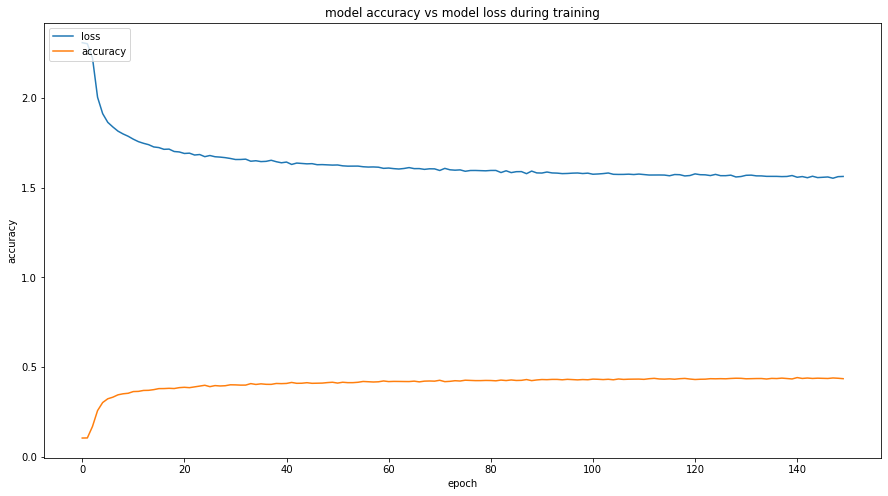

In [14]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy vs model loss during training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

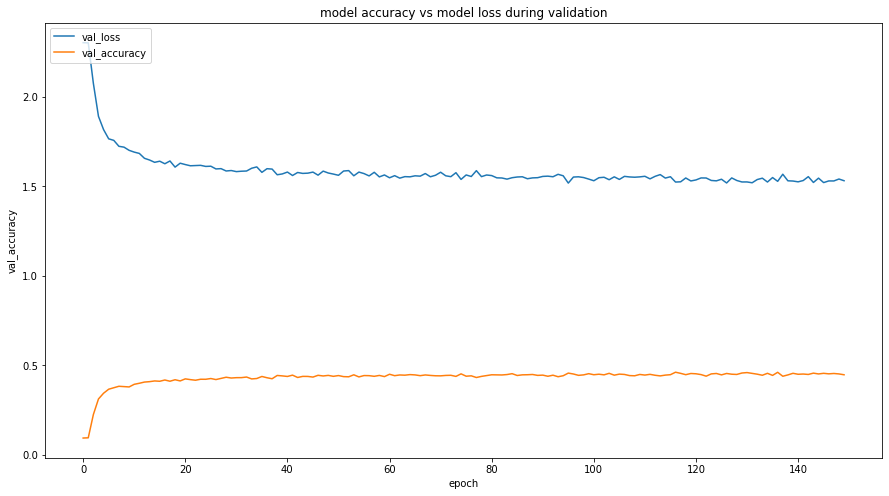

In [15]:
plt.figure(figsize=(15,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy vs model loss during validation')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper left')
plt.show()

In [16]:
x_val[0].shape

(3072,)

In [17]:
test = np.expand_dims(x_val[0], axis = 0)
test.shape

(1, 3072)

In [18]:
np.set_printoptions(precision = 3)

In [20]:
model_3.predict(test)

1/1 [==============================] - 1s 722ms/step


array([[0.016, 0.009, 0.104, 0.139, 0.216, 0.103, 0.361, 0.045, 0.004,
        0.004]], dtype=float32)

In [21]:
model_3.predict(test).shape

1/1 [==============================] - 0s 32ms/step


(1, 10)

In [23]:
np.argmax(model_3.predict(test), axis =1)[0]

1/1 [==============================] - 0s 32ms/step


6

In [24]:
y_val[0][0]

6

In [25]:
for number in range(20):
    
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = np.argmax(model_3.predict(test_img)[0])
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

1/1 [==============================] - 0s 24ms/step
Actual value: 6 vs. predicted: 6
1/1 [==============================] - 0s 16ms/step
Actual value: 9 vs. predicted: 1
1/1 [==============================] - 0s 24ms/step
Actual value: 9 vs. predicted: 9
1/1 [==============================] - 0s 24ms/step
Actual value: 4 vs. predicted: 6
1/1 [==============================] - 0s 16ms/step
Actual value: 1 vs. predicted: 9
1/1 [==============================] - 0s 24ms/step
Actual value: 1 vs. predicted: 1
1/1 [==============================] - 0s 24ms/step
Actual value: 2 vs. predicted: 2
1/1 [==============================] - 0s 32ms/step
Actual value: 7 vs. predicted: 7
1/1 [==============================] - 0s 32ms/step
Actual value: 8 vs. predicted: 8
1/1 [==============================] - 0s 32ms/step
Actual value: 3 vs. predicted: 7
1/1 [==============================] - 0s 32ms/step
Actual value: 4 vs. predicted: 4
1/1 [==============================] - 0s 32ms/step
Actual value:

In [26]:
test_loss, test_accuracy=model_3.evaluate(x_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 1.5288 - accuracy: 0.4553


In [27]:
predictions = np.argmax(model_3.predict(x_test), axis = 1)

313/313 [==============================] - 1s 3ms/step


In [28]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [29]:
predictions

array([3, 9, 8, ..., 5, 4, 7], dtype=int64)

In [30]:
predictions.shape

(10000,)

In [31]:
conf_matrix

array([[375,  37,  89,  30,  67,   5,  54,  41, 261,  41],
       [ 17, 545,  28,  33,  24,  11,  51,  21, 105, 165],
       [ 57,  18, 280,  61, 271,  38, 188,  45,  30,  12],
       [ 12,  20,  95, 234, 129, 126, 287,  42,  26,  29],
       [ 29,   4, 101,  30, 532,  14, 191,  52,  36,  11],
       [  4,   5, 115, 155, 133, 287, 206,  39,  35,  21],
       [  2,   6,  48,  43, 161,  19, 696,   8,   6,  11],
       [ 27,   9,  73,  64, 213,  42,  86, 425,  30,  31],
       [ 40,  56,  28,  28,  36,  18,  31,  16, 682,  65],
       [ 18, 154,  10,  44,  23,  16,  76,  50, 112, 497]], dtype=int64)

In [32]:
conf_matrix.shape

(10, 10)

In [33]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [34]:
conf_matrix

array([[375,  37,  89,  30,  67,   5,  54,  41, 261,  41],
       [ 17, 545,  28,  33,  24,  11,  51,  21, 105, 165],
       [ 57,  18, 280,  61, 271,  38, 188,  45,  30,  12],
       [ 12,  20,  95, 234, 129, 126, 287,  42,  26,  29],
       [ 29,   4, 101,  30, 532,  14, 191,  52,  36,  11],
       [  4,   5, 115, 155, 133, 287, 206,  39,  35,  21],
       [  2,   6,  48,  43, 161,  19, 696,   8,   6,  11],
       [ 27,   9,  73,  64, 213,  42,  86, 425,  30,  31],
       [ 40,  56,  28,  28,  36,  18,  31,  16, 682,  65],
       [ 18, 154,  10,  44,  23,  16,  76,  50, 112, 497]], dtype=int64)

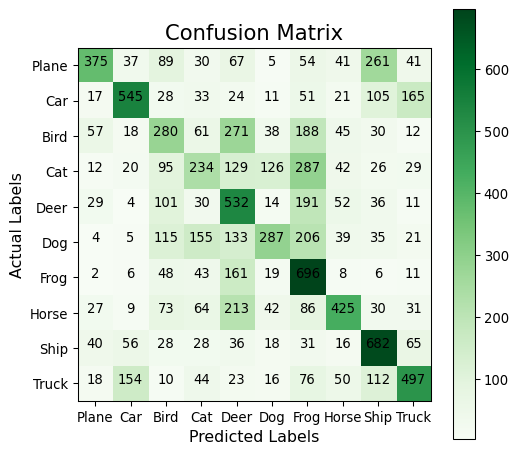

In [35]:
plt.figure(figsize=(6,6), dpi=95)

plt.imshow(conf_matrix, cmap = plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)


for i , j in itertools.product(range(nr_rows), range(nr_cols)):
    
    plt.text(j, i, conf_matrix[i,j], horizontalalignment = 'center')


tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

plt.show()

In [36]:
np.diag(conf_matrix)

array([375, 545, 280, 234, 532, 287, 696, 425, 682, 497], dtype=int64)

In [37]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)                # individual value of row / sum of row that row
recall

array([0.375, 0.545, 0.28 , 0.234, 0.532, 0.287, 0.696, 0.425, 0.682,
       0.497])

In [38]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)             # individual value of row / sum of that column
precision

array([0.645, 0.638, 0.323, 0.324, 0.335, 0.498, 0.373, 0.575, 0.515,
       0.563])

In [39]:
avg_recall = np.mean(recall)                         # mean value of recall
avg_recall

0.4553

In [40]:
avg_precision = np.mean(precision)                    # mean value of precision
avg_precision

0.47901711213038994

In [41]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
f1_score

0.46685753331793794